# introducao-CNN

## Exercício 1:

* Abra a imagem figs/messi5.jpg
* recorte a bola
* copie em outra parte da imagem
* rotacione a imagem em 60 graus
* Altere o tamanho da imagem mantendo a proporção


### Bibliotecas

In [2]:
import cv2 as cv
import numpy as np
import imutils
from matplotlib import pyplot as plt

### Visualizando a imagem

Dimensões da imagem: (342, 548, 3)



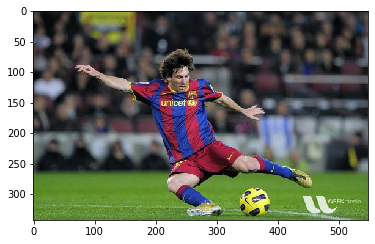

In [3]:
img = cv.imread('figs/messi5.jpg')
print('Dimensões da imagem: {}\n'.format(img.shape))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### Recortando a bola

Através da visualização acima, podemos observar onde a bola está aproximadamente.

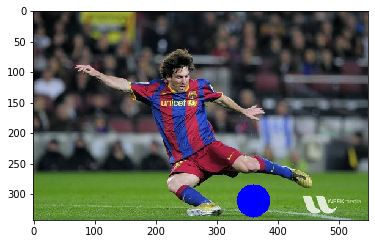

In [4]:
# Identificando o posicionamento da bola
# Desenhando um circulo para identificar o posicionamento
output = img.copy()
cv.circle(output, (360, 310), 27, (255, 0, 0), -1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

(54, 54, 3)


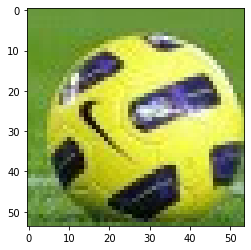

In [5]:
# Fazendo o crop da bola
bola = img[310-27:310+27, 360-27:360+27]
plt.imshow(cv.cvtColor(bola, cv.COLOR_BGR2RGB))
print(bola.shape)

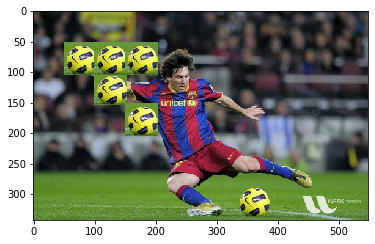

In [6]:
# Trocando a bola de lugar
troca_bola = img.copy()
troca_bola[50:104, 50:104] = bola
troca_bola[100:154, 100:154] = bola
troca_bola[150:204, 150:204] = bola
troca_bola[50:104, 100:154] = bola
troca_bola[50:104, 150:204] = bola
plt.imshow(cv.cvtColor(troca_bola, cv.COLOR_BGR2RGB))

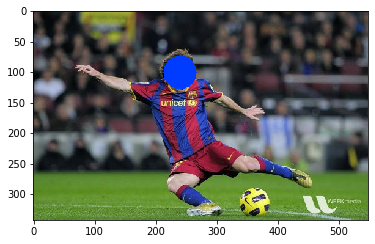

In [7]:
# Encontrando a cabeça do Messi
output = img.copy()
cv.circle(output, (240, 100), 27, (255, 60, 0), -1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

(54, 54, 3)


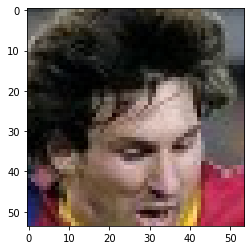

In [8]:
# Fazendo o crop da cabeça do Messi
cabeca = img[100-27:100+27, 240-27:240+27]
plt.imshow(cv.cvtColor(cabeca, cv.COLOR_BGR2RGB))
print(cabeca.shape)

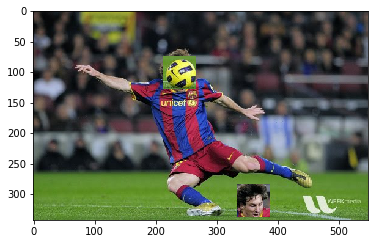

In [9]:
# Colocando a bola na cabeça do Messi
output = img.copy()
output[100-27:100+27, 240-27:240+27] = bola
output[310-27:310+27, 360-27:360+27] = cabeca
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

## Rotacionando a imagem em 60 graus

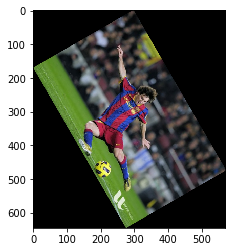

In [10]:
rotated = imutils.rotate_bound(img, 60)
plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))

## Altere o tamanho da imagem mantendo a proporção

Original Dimensions :  (342, 548, 3)
novas dimensões :  (684, 1096, 3)


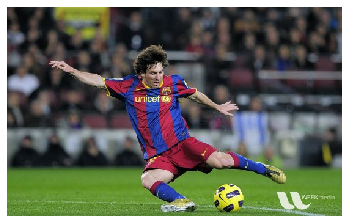

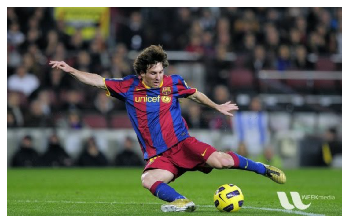

In [11]:
print('Original Dimensions : ',img.shape)
 
scale_percent = 200 # porcentagem da imagem original
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv.resize(img,dim)
 
print('novas dimensões : ',resized.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

---

## Exercício 2:

* Avalie o uso de filtros para eliminar ruídos e detectar contornos na imagem figs/11.jpg.
* Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias.


Dimensões da imagem: (300, 300, 3)



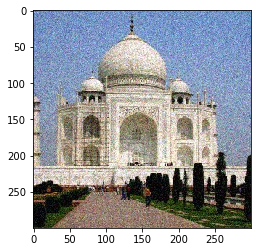

In [12]:
img = cv.imread('figs/11.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print('Dimensões da imagem: {}\n'.format(img.shape))
plt.imshow(img)

## Aplicando blur

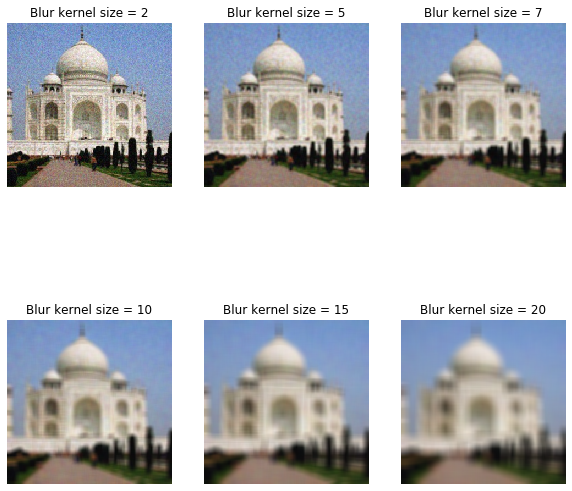

In [13]:
# Plot the image with different kernel sizes
kernels = [2, 5, 7, 10, 15, 20]
rows = 2
cols = 3
fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 10))
for ind, s in enumerate(kernels):
    img_blurred = cv.blur(img, ksize = (s, s))
    ax = axs[ind//cols, ind%cols]
    ax.imshow(img_blurred)
    ax.axis('off')
    ax.set_title('Blur kernel size = {}'.format(s))
plt.show()

## Diferentes tipos de blur

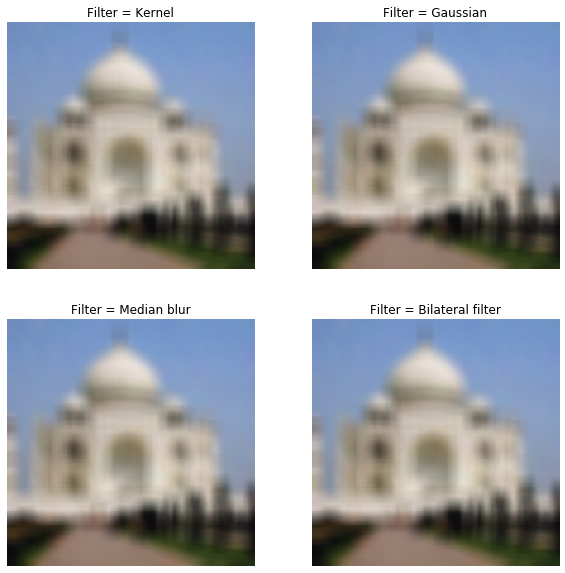

In [14]:
# Distincts blur filters
img_0 = cv.blur(img, ksize = (7, 7))
img_1 = cv.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv.medianBlur(img, 7)
img_3 = cv.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
# Plot the images
images = [img_0, img_1, img_2, img_3]
filters = ['Kernel', 'Gaussian', 'Median blur', 'Bilateral filter']
rows = 2
cols = 2
fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 10))
for ind, s in enumerate(images):
    ax = axs[ind//cols, ind%cols]
    ax.imshow(img_blurred)
    ax.axis('off')
    ax.set_title('Filter = {}'.format(filters[ind]))
plt.show()

## Aplicando threesolds

Threesholds na imagem original.

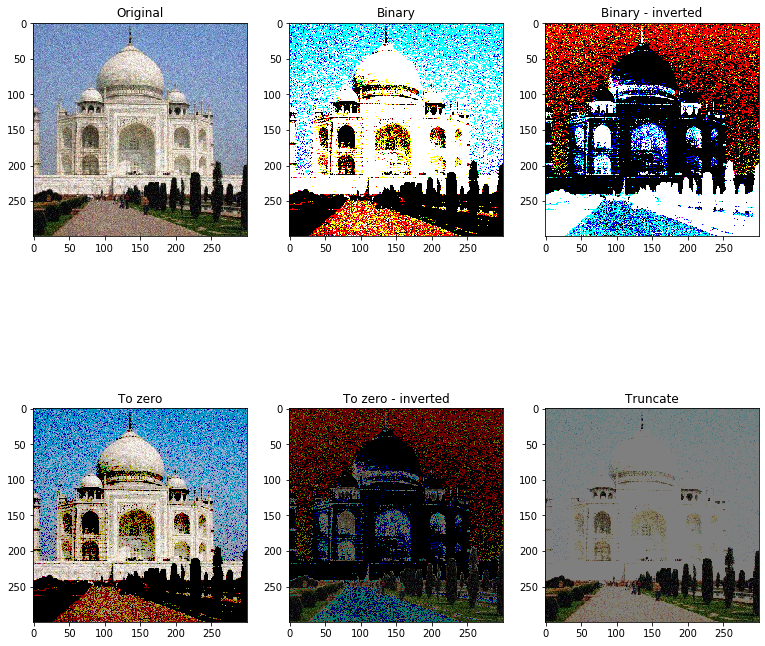

In [15]:
# Thresholding 
_, thresh_0 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
_, thresh_1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
_, thresh_2 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, thresh_3 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
_, thresh_4 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
threshold = ['Original','Binary', 'Binary - inverted', 'To zero', 'To zero - inverted', 'Truncate']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.set_title(threshold[ind])
    ax.imshow(p)
plt.show()

Threshold na imagem em escalas de cinza.

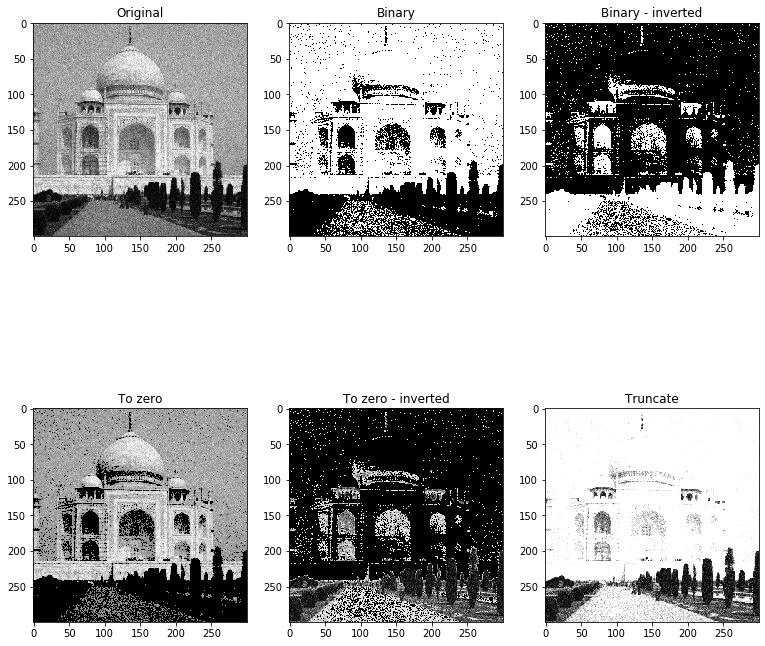

In [16]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Thresholding 
_, thresh_0 = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)
_, thresh_1 = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY_INV)
_, thresh_2 = cv.threshold(img_gray, 127, 255, cv.THRESH_TOZERO)
_, thresh_3 = cv.threshold(img_gray, 127, 255, cv.THRESH_TOZERO_INV)
_, thresh_4 = cv.threshold(img_gray, 127, 255, cv.THRESH_TRUNC)
# Plot the images
images = [img_gray, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
threshold = ['Original','Binary', 'Binary - inverted', 'To zero', 'To zero - inverted', 'Truncate']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.set_title(threshold[ind])
    ax.imshow(p, cmap='gray')
plt.show()

## Aplicando thresholds adaptativos

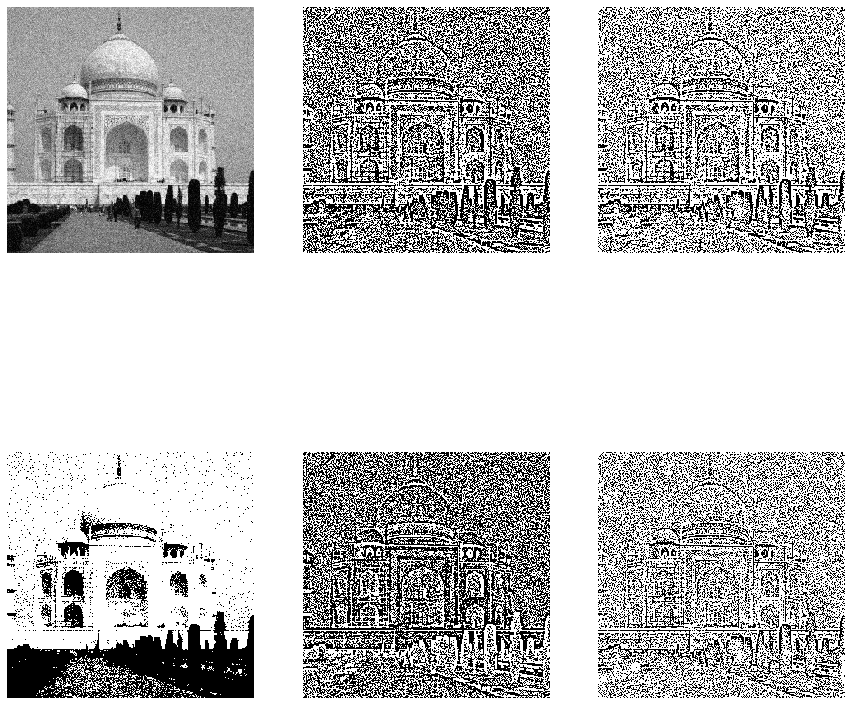

In [19]:
# Adaptive Thresholding
_, thresh_binary = cv.threshold(img_gray, thresh = 127, maxval = 255, type = cv.THRESH_BINARY)

adap_mean_2 = cv.adaptiveThreshold(img_gray, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv.adaptiveThreshold(img_gray, 255, 
                                        cv.ADAPTIVE_THRESH_MEAN_C, 
                                        cv.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv.adaptiveThreshold(img_gray, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv.adaptiveThreshold(img_gray, 255, 
                                    cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv.THRESH_BINARY, 7, 8)

# Plot the images
images = [img_gray, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

## Detecção de bordas

Detecção de bordas utilizando canny 

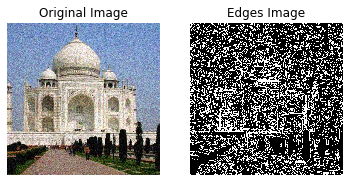

In [26]:
edges = cv.Canny(img,100,200)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Original Image')
ax[0].axis(False)
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edges Image')
ax[1].axis(False)
plt.show()

Como pode se observar acima, o algorimo não consegue identificar os contornos de maneira eficaz na imagem original.

Pode-se tentar utilizar algum dos filtros aplicados anteriormente, assim eliminam-se ruídos na imagem.

Vamos verificar como a imagem se comporta utilizando blur antes de utilizar o algoritmo canny.

Tentaremos com Kernel de tamanho 3, 5 e 8.

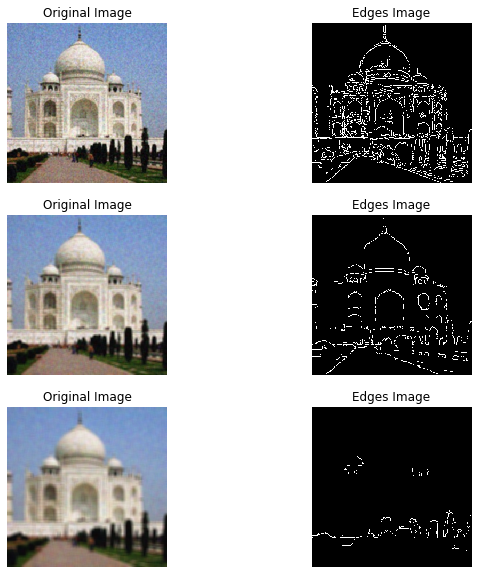

In [35]:
img_blurred_3 = cv.blur(img, ksize = (3, 3))
img_blurred_5 = cv.blur(img, ksize = (5, 5))
img_blurred_8 = cv.blur(img, ksize = (8, 8))

edges_3 = cv.Canny(img_blurred_3,100,200)
edges_5 = cv.Canny(img_blurred_5,100,200)
edges_8 = cv.Canny(img_blurred_8,100,200)

fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].imshow(img_blurred_3,cmap = 'gray')
ax[0,0].set_title('Original Image')
ax[0,0].axis(False)
ax[0,1].imshow(edges_3,cmap = 'gray')
ax[0,1].set_title('Edges Image')
ax[0,1].axis(False)

ax[1,0].imshow(img_blurred_5,cmap = 'gray')
ax[1,0].set_title('Original Image')
ax[1,0].axis(False)
ax[1,1].imshow(edges_5,cmap = 'gray')
ax[1,1].set_title('Edges Image')
ax[1,1].axis(False)

ax[2,0].imshow(img_blurred_8,cmap = 'gray')
ax[2,0].set_title('Original Image')
ax[2,0].axis(False)
ax[2,1].imshow(edges_8,cmap = 'gray')
ax[2,1].set_title('Edges Image')
ax[2,1].axis(False)
plt.show()


Já se pode observar uma melhora na identificação de contorno, com kernel de tramanhos 3 ou 5.

Podemos tentar também outros tipos de blue.

Abaixo uma tentativa de encontrar as bordas com gaussian blur.

(-0.5, 299.5, 299.5, -0.5)

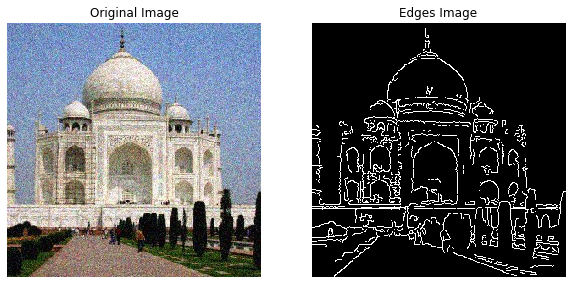

In [48]:
img_blurred = cv.GaussianBlur(img, ksize = (5, 5), sigmaX = 0)   

edges = cv.Canny(img_blurred,100,200)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Original Image')
ax[0].axis(False)
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edges Image')
ax[1].axis(False)

Observa-se uma melhora significativa na busca pelos contornos utilizando gaussian blur

## Classificadores

### Classificador 1: faces de gatos

In [119]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalcatface.xml')
# Create the face detecting function 
def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
 
    print(len(face_rects))
    for (x, y, w, h) in face_rects:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2

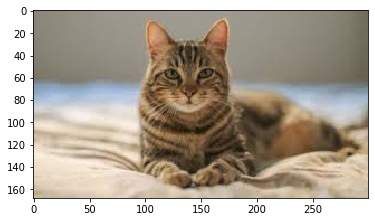

In [120]:
img = cv.imread('figs/images.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = 'gray')

1


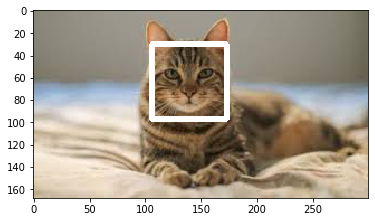

In [121]:
roi_detected = detect_face(img)
plt.imshow(roi_detected, cmap = 'gray')

### Identificando gatos em um conjunto de imagens

1
0
1


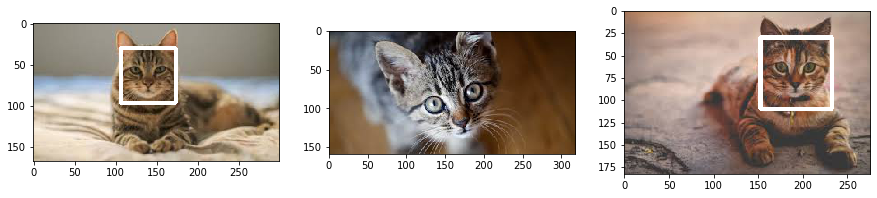

In [122]:
images = ['cat1.jpeg', 'cat2.jpeg', 'cat3.jpeg']
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    img = cv.imread('cats_and_faces/'+p)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    roi_detected = detect_face(img);
    ax = axs[ind]
    # ax.set_title(threshold[ind])
    ax.imshow(roi_detected)
plt.show()

### Classificador 2: identificando os olhos

In [123]:
face_cascade = cv.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
# Create the face detecting function 
def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
 
    print(len(face_rects))
    for (x, y, w, h) in face_rects:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2

### Identificando olhos esquerdos em um conjuntos de imagens

2
1
2


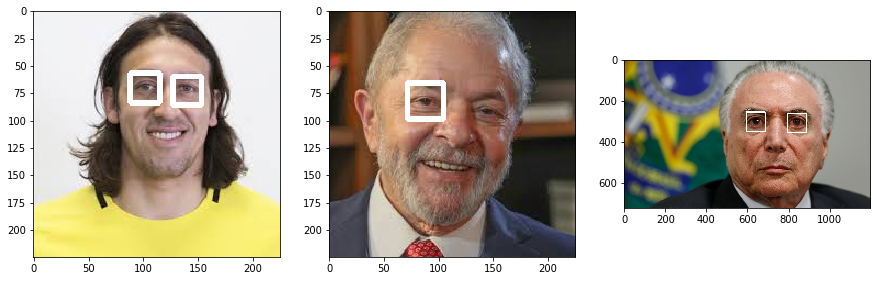

In [124]:
images = ['face1.jpeg', 'face2.jpeg', 'face3.jpg']
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    img = cv.imread('cats_and_faces/'+p)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    roi_detected = detect_face(img);
    ax = axs[ind]
    # ax.set_title(threshold[ind])
    ax.imshow(roi_detected)
plt.show()